## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

## Data Cleaning and Understanding

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
dataset.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
len(dataset.isna().any()) 

11

In [9]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Making all categorical features as object datatype

In [10]:
dataset_2 = dataset

In [11]:
def make_dtype_object(dataset, feature):
    dataset[feature] = dataset[feature].astype(str)

In [12]:
for feature in ['HasCrCard', 'IsActiveMember', 'Exited']: make_dtype_object(dataset_2, feature)

In [13]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


### Countplots of all categorical features

In [14]:
categorical_dataset = dataset_2.select_dtypes(include='object')


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

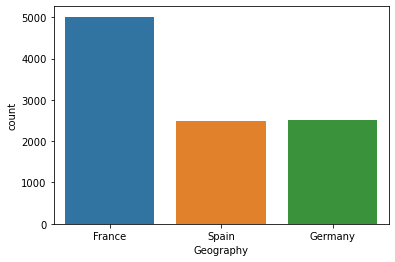

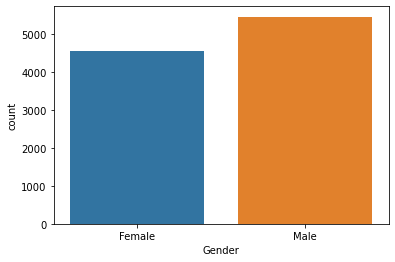

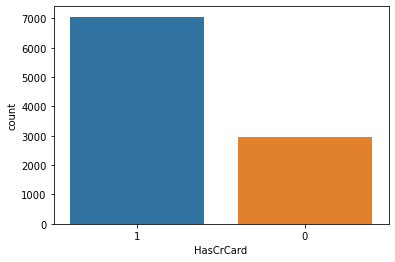

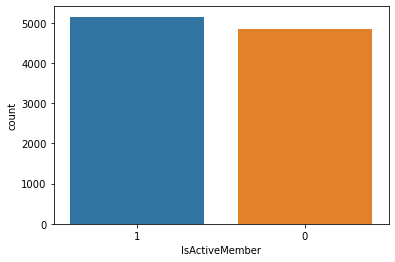

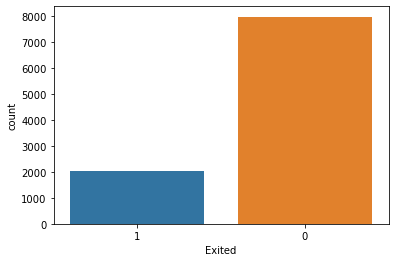

In [15]:
for category in categorical_dataset.columns:
    plt.figure()
    sns.countplot(categorical_dataset[category])

### Encoding the categorical features

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
for category in categorical_dataset.columns:
    dataset[category] = le.fit_transform(dataset[category])
    print(dataset[category])

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32
0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: HasCrCard, Length: 10000, dtype: int32
0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: IsActiveMember, Length: 10000, dtype: int32
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int32


In [19]:
X = dataset.iloc[:, :-1 ] 
y = dataset['Exited']

### Scaling the features

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
def scale_feature(dataset, feature):
    dataset['scaled_' + feature] = StandardScaler().fit_transform(dataset[[feature]])


In [22]:
scale_list = ['EstimatedSalary', 'Balance', 'NumOfProducts', 'Age', 'Tenure']
for feature in scale_list: scale_feature(X, feature) 


In [23]:
X = X.drop(scale_list, axis=1)

In [24]:
X

,CreditScore,Geography,Gender,HasCrCard,IsActiveMember,scaled_EstimatedSalary,scaled_Balance,scaled_NumOfProducts,scaled_Age,scaled_Tenure
0,619,0,0,1,1,0.021886,-1.225848,-0.911583,0.293517,-1.041760
1,608,2,0,0,1,0.216534,0.117350,-0.911583,0.198164,-1.387538
2,502,0,0,1,0,0.240687,1.333053,2.527057,0.293517,1.032908
3,699,0,0,0,0,-0.108918,-1.225848,0.807737,0.007457,-1.387538
4,850,2,0,1,1,-0.365276,0.785728,-0.911583,0.388871,-1.041760
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,1,0,-0.066419,-1.225848,0.807737,0.007457,-0.004426
9996,516,0,1,1,1,0.027988,-0.306379,-0.911583,-0.373958,1.724464
9997,709,0,0,0,1,-1.008643,-1.225848,-0.911583,-0.278604,0.687130
9998,772,1,1,1,0,-0.125231,-0.022608,0.807737,0.293517,-0.695982


## Splitting data into Training and Test Sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Building Models

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr_clf = LogisticRegression()

In [29]:
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
lr_pred_y = lr_clf.predict(X_test)

### Grid Search for best parameters

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [32]:
lr_grid_params  = {
    'solver' : ['saga', 'newton-cg', 'lbfgs', 'sag'],
      'penalty' : ['elasticnet', 'l1', 'l2', 'none'],
      'max_iter' : range(50,500, 50),
      'C' : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [33]:
lr_grid_search = GridSearchCV(LogisticRegression(), lr_grid_params, scoring='f1', n_jobs=-1, cv=kfold, verbose = 3)

In [34]:
lr_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3780 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
540 fi

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': range(50, 500, 50),
                         'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                         'solver': ['saga', 'newton-cg', 'lbfgs', 'sag']},
             scoring='f1', verbose=3)

In [35]:
lr_grid_search.best_estimator_

LogisticRegression(C=100)

In [36]:
best_lr_clf = LogisticRegression(C=100)

In [37]:
best_lr_clf.fit(X_train, y_train)

LogisticRegression(C=100)

In [38]:
best_lr_pred_y = best_lr_clf.predict(X_test)

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

In [40]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rf_pred_y = rf_clf.predict(X_test)

### Grid search for best parameters

In [42]:
rf_grid_params ={ 

    'n_estimators': range(100, 501, 50),
    'criterion':['gini', 'log_loss', 'entropy'],
    'min_samples_split':range(2,11,1),
    'max_depth':range(2,11,1)
    
}

In [43]:
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_grid_params, scoring='f1', n_jobs=-1, cv=kfold, verbose = 3 )

In [44]:
rf_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 2187 candidates, totalling 21870 fits


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
7290 fits failed out of a total of 21870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7290 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Administrator\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Use

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'log_loss', 'entropy'],
                         'max_depth': range(2, 11),
                         'min_samples_split': range(2, 11),
                         'n_estimators': range(100, 501, 50)},
             scoring='f1', verbose=3)

In [45]:
rf_grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=6)

In [46]:
best_rf_clf = RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=150)

In [47]:
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=8, n_estimators=150)

In [48]:
best_rf_pred_y = best_rf_clf.predict(X_test)

# Performance Evaluation

In [49]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [50]:
def calculate_metrics(estimator,y_true, y_pred):
    results = pd.DataFrame([[estimator, accuracy_score(y_true, y_pred), precision_score(y_true, y_pred),
                  f1_score(y_true, y_pred), recall_score(y_true, y_pred)]], 
                 columns=['Model', 'accuracy_score', 'precision_score', 'f1_score', 'recall_score'])
    print(results)
    return results
    

In [51]:
best_lr_results = calculate_metrics('BestLogisticRegression', y_test, best_lr_pred_y)
lr_results = calculate_metrics('LogisticRegression', y_test, lr_pred_y)

                    Model  accuracy_score  precision_score  f1_score  \
0  BestLogisticRegression          0.8115         0.529412   0.22268   

   recall_score  
0      0.140992  
                Model  accuracy_score  precision_score  f1_score  recall_score
0  LogisticRegression          0.8115         0.529412   0.22268      0.140992


In [52]:
rf_results = calculate_metrics('RF', y_test, rf_pred_y)
best_rf_results = calculate_metrics('Best RF', y_test, best_rf_pred_y)

  Model  accuracy_score  precision_score  f1_score  recall_score
0    RF           0.858         0.734597  0.521886        0.4047
     Model  accuracy_score  precision_score  f1_score  recall_score
0  Best RF          0.8615         0.791209  0.509735      0.375979
